In [8]:
import docx2txt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

%matplotlib inline

import re
from calendar import month_name
from nltk.corpus import stopwords

from PyPDF2 import PdfReader

import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('averaged_perceptron_tagger')

from nltk.tag import pos_tag

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [9]:
# Input filename along with path here
fileNamePath = "Resume.docx"

In [10]:
try:
    # Extract text from .pdf file
    if fileNamePath.endswith(".pdf"):
        # creating a pdf reader object
        reader = PdfReader(fileNamePath)
        
        # printing number of pages in pdf file
        print(len(reader.pages))
        
        # getting a specific page from the pdf file
        page = reader.pages[0]
        
        # extracting text from page
        text = page.extract_text()

    elif fileNamePath.endswith(".docx"):
        text = docx2txt.process(fileNamePath)

    else:
        print("Unrecognizable file format")
except:
    print("Cannot process input format, please use .pdf or .docx format only")

# print(text)

In [11]:
type(text)

str

As we can see, the text output is string object. Now, we will clean up the string by removing URLs, Stopwords, numbers, special characters, etc.

In [12]:
# Remove URLs from the string
text = re.sub(r'http\S+', '', text)

# Remove mail addresses from the string
text = re.sub(r'\S*@\S*\s?', '', text)

# Remove non-textual data from the string
text = re.sub('[^a-zA-Z \n\.]', '', text)

# creating pattern for months and removing months from the text
str_pattern = ''
for i in month_name[1:]:
    str_pattern = str_pattern + i + '|'

str_pattern = re.sub('\|$', '', str_pattern)

text = re.sub(pattern=str_pattern, repl='', string=text)

# Updating stop words with more stop words
more_stopwords = {'Pvt', 'Ltd'}
STOPWORDS.update(more_stopwords)

# Remove general stop words from text
text = ' '.join([word for word in text.split() if word not in STOPWORDS])

# print(text)

In [13]:
tagged_set = pos_tag(text.split())

updated_text = [word for word,tag in tagged_set if tag != 'NNP' and tag != 'NNPS']

text = ' '.join(updated_text)

# print(text)

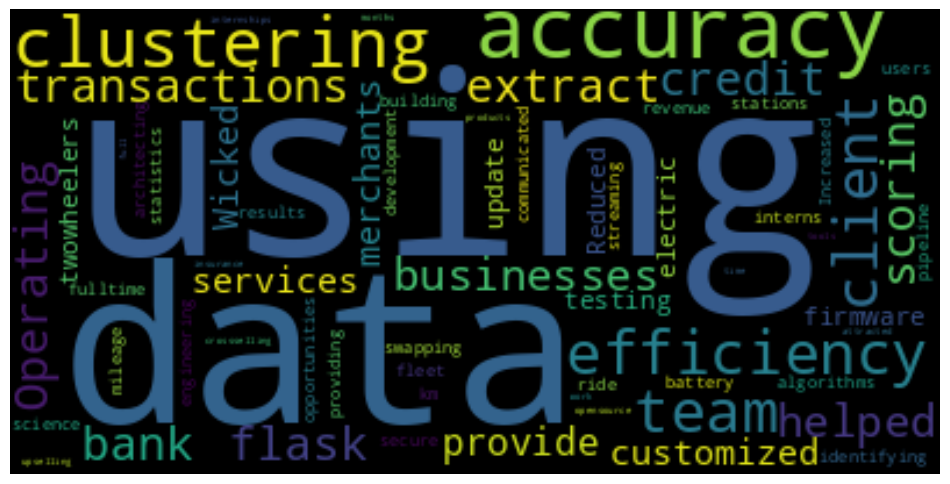

In [14]:
# Create the word cloud object
wordcloud = WordCloud().generate(text)

# Display the generated image
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()